In [ ]:
# Step 1: Upload the dataset.zip
from google.colab import files
uploaded = files.upload()


Saving dataset.zip to dataset.zip


In [ ]:
# Step 2: Extract the zip file
import zipfile
import os

zip_path = 'dataset.zip'
extracted_path = 'covid_dataset'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_path)

os.listdir(extracted_path)


['CONVENIENT_global_confirmed_cases.csv',
 'CONVENIENT_global_deaths.csv',
 'RAW_us_confirmed_cases.csv',
 'CONVENIENT_us_confirmed_cases.csv',
 'RAW_us_deaths.csv',
 'RAW_global_deaths.csv',
 'CONVENIENT_us_metadata.csv',
 'RAW_global_confirmed_cases.csv',
 'CONVENIENT_global_metadata.csv',
 'CONVENIENT_us_deaths.csv']

In [ ]:
# Step 3: Load global confirmed cases data
import pandas as pd

file_path = os.path.join(extracted_path, 'CONVENIENT_global_confirmed_cases.csv')
df = pd.read_csv(file_path)

# Drop the metadata row and fix headers
df = df.drop(index=0)
df.rename(columns={'Country/Region': 'Date'}, inplace=True)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df = df.apply(pd.to_numeric, errors='coerce')

# Extract India's time series
india_cases = df['India'].dropna()
india_cases.head()


<ipython-input-3-1d8f4b01915a>:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


,India
Date,
2020-01-23,0.0
2020-01-24,0.0
2020-01-25,0.0
2020-01-26,0.0
2020-01-27,0.0


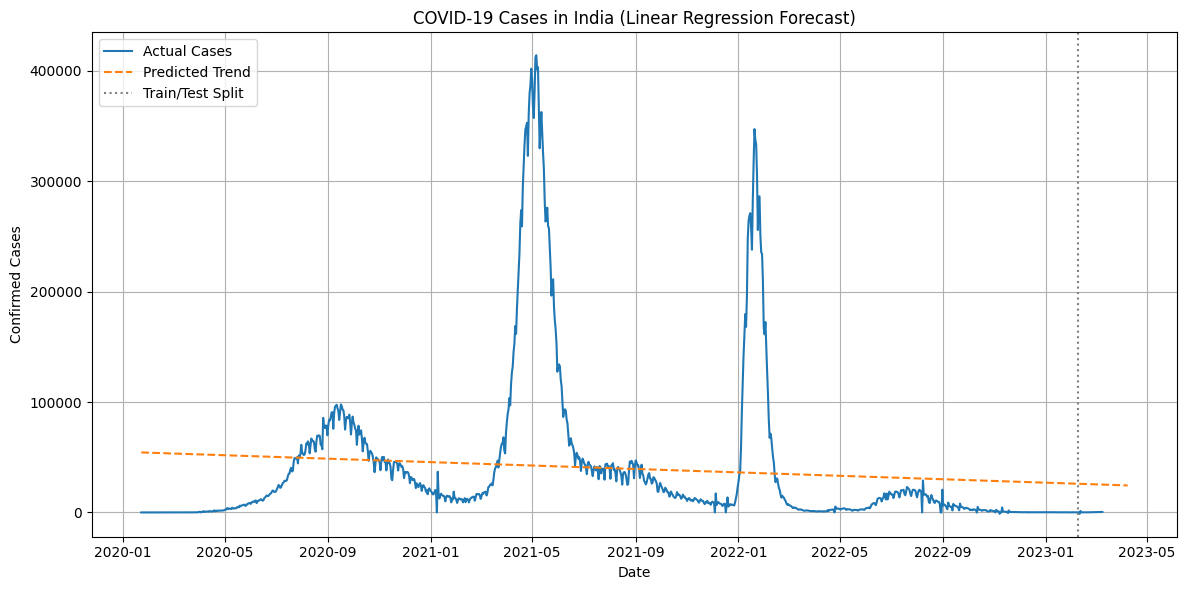

In [ ]:
# Step 4: Linear Regression and Prediction
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# Prepare features (days since start)
X = np.arange(len(india_cases)).reshape(-1, 1)
y = india_cases.values

# Train/test split
train_size = len(X) - 30
X_train, y_train = X[:train_size], y[:train_size]

# Train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict for historical + 30 future days
X_future = np.arange(len(india_cases) + 30).reshape(-1, 1)
y_pred = model.predict(X_future)

# Create date range for full prediction
future_dates = pd.date_range(start=india_cases.index[0], periods=len(X_future))

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(india_cases.index, y, label='Actual Cases')
plt.plot(future_dates, y_pred, label='Predicted Trend', linestyle='--')
plt.axvline(india_cases.index[train_size], color='gray', linestyle=':', label='Train/Test Split')
plt.title('COVID-19 Cases in India (Linear Regression Forecast)')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predict only for the actual data period (not future)
y_test_pred = model.predict(X)

# Metrics
mae = mean_absolute_error(y, y_test_pred)
mse = mean_squared_error(y, y_test_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_test_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")



Mean Absolute Error (MAE): 40853.48
Mean Squared Error (MSE): 5040626832.77
Root Mean Squared Error (RMSE): 70997.37
R² Score: 0.0174
